In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

traffic_df = pd.read_csv('website_traffic.csv')
traffic_df

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [2]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


**1. Calculate Correlations**

In [26]:
traffic_corr = traffic_df.corr(numeric_only=True)
traffic_corr

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000


In [4]:
conversion_corr = traffic_corr['Conversion Rate']
conversion_corr

Page Views          0.126635
Session Duration    0.177798
Bounce Rate        -0.049051
Time on Page        0.229669
Previous Visits     0.109496
Conversion Rate     1.000000
Name: Conversion Rate, dtype: float64

**2. Feature Selection:**
   Features with positive correlation: Page Views, Session Duration,
   Time on Page, Previous Visits.

In [14]:
# feature selection
X = traffic_df[['Time on Page', 'Session Duration', 'Page Views', 'Previous Visits']]
X

,Time on Page,Session Duration,Page Views,Previous Visits
0,3.890460,11.051381,5,3
1,8.478174,3.429316,4,0
2,9.636170,1.621052,4,2
3,2.071925,3.629279,5,3
4,1.960654,4.235843,5,5
...,...,...,...,...
1995,1.324206,2.724513,1,2
1996,3.824416,0.392856,3,1
1997,1.288675,9.899823,4,1
1998,5.037584,0.393319,3,2


**3. Target Variable**

In [25]:
# Prediction Target

y = traffic_df['Conversion Rate']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Name: Conversion Rate, Length: 2000, dtype: float64

**4. Data Splitting & 5. Calculate MAE:** 

In [19]:
from sklearn.tree import DecisionTreeRegressor

traffic_model = DecisionTreeRegressor(random_state = 1)
traffic_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# val = validation set
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 1)

traffic_model = DecisionTreeRegressor(random_state = 1)
traffic_model.fit(train_X, train_y)
predictions = traffic_model.predict(val_X)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(val_y, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.027149405896942636


**6. Analyse Results**

An MAE of 0.0271 means that, on average, the predictions made by your DecisionTreeRegressor model are off by **about 0.0271 units** from the actual Conversion Rate values.

Since Conversion Rate is a percentage (it's in the range of 0 to 1), this error represents the average deviation from the true conversion rate.

A lower MAE indicates a model that predicts the target variable more accurately. In this case, **an MAE of 0.0271 suggests** that the model's predictions are **quite close** to the actual conversion rates.

**7. Determine the optimal number of clusters.**

In [5]:
# cluster cannot do to string. 
# So, need to drop this column first.
new_traffic = traffic_df.drop('Traffic Source', axis=1)
new_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Time on Page      2000 non-null   float64
 4   Previous Visits   2000 non-null   int64  
 5   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


C:\Users\leeqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leeqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\leeqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leeqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

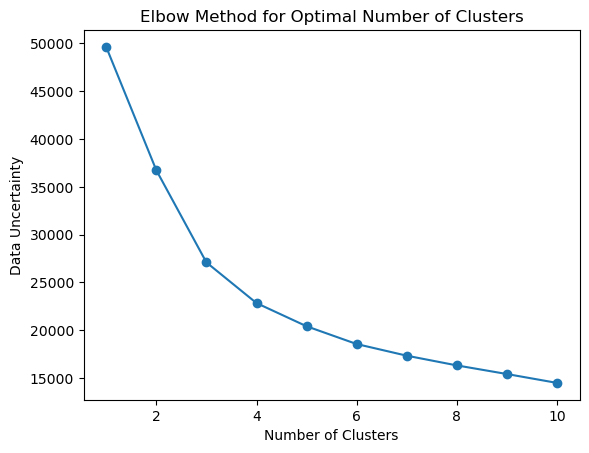

In [6]:
from sklearn.cluster import KMeans

clustercol = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(new_traffic)
    clustercol.append(km.inertia_)

# Plotting the elbow curve
fig, ax = plt.subplots()
ax.plot(range(1, 11), clustercol, '-o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Data Uncertainty')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

**8. Clustering**

In [28]:
# in this case, choose 3 because it has sharp difference
kmeans = KMeans(n_clusters = 3, random_state = 40)
kmeans.fit(new_traffic)
new_traffic['clusters'] = kmeans.predict(new_traffic)

new_traffic

C:\Users\leeqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leeqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,clusters
0,5,11.051381,0.230652,3.890460,3,1.0,2
1,4,3.429316,0.391001,8.478174,0,1.0,1
2,4,1.621052,0.397986,9.636170,2,1.0,1
3,5,3.629279,0.180458,2.071925,3,1.0,0
4,5,4.235843,0.291541,1.960654,5,1.0,0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0,0
1996,3,0.392856,0.095559,3.824416,1,1.0,0
1997,4,9.899823,0.446622,1.288675,1,1.0,2
1998,3,0.393319,0.278340,5.037584,2,1.0,0


**9. Cluster Analysis**

In [8]:
cluster_means = new_traffic.groupby('clusters').mean()
cluster_means

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
clusters,,,,,,
0,4.865385,2.247203,0.291673,8.748891,1.961538,1.000000
1,4.759582,9.038665,0.281532,3.437090,1.871080,1.000000
2,3.528694,1.930577,0.282669,2.824702,1.943834,0.964002
3,7.309434,1.982771,0.285016,2.963030,2.101887,0.987949


**Cluster 0:**

**Page Views:** Moderate average page views (4.87).
**Session Duration:** Short session duration (2.25 minutes).
**Bounce Rate:** Slightly higher bounce rate (0.29), indicating that users in this cluster are more likely to leave after viewing only one page.
**Time on Page:** High time on page (8.75 minutes), suggesting that users in this cluster are spending a significant amount of time on individual pages.
**Previous Visits:** Moderate number of previous visits (1.96).
**Conversion Rate:** Perfect conversion rate (1.00), meaning all users in this cluster eventually convert.
**Interpretation:** This cluster likely represents users who **spend a lot of time on individual pages** but may **navigate away frequently**. Despite this, they all **end up converting**, possibly **after thorough research or consideration**.

**Cluster 1:**

**Page Views:** Moderate average page views (4.76).
**Session Duration:** Very long session duration (9.04 minutes), indicating users in this cluster spend a significant amount of time on the site.
**Bounce Rate:** Slightly lower bounce rate (0.28).
**Time on Page:** Low time on page (3.44 minutes), suggesting that users might be skimming through pages.
**Previous Visits:** Lower number of previous visits (1.87).
**Conversion Rate:** Perfect conversion rate (1.00).
Interpretation: This cluster likely includes **highly engaged users** who **spend a lot of time on the site**, possibly exploring **multiple pages** before converting. They seem to be serious **about the purchase or action they intend to complete**.

**Cluster 2:**

**Page Views:** Lower average page views (3.53).
**Session Duration:** Short session duration (1.93 minutes).
**Bounce Rate:** Slightly lower bounce rate (0.28).
**Time on Page:** Very low time on page (2.82 minutes).
**Previous Visits:** Moderate number of previous visits (1.94).
**Conversion Rate:** Lower conversion rate (0.96).
Interpretation: This cluster might represent **users who are less engaged**. They **spend less time on the site** and **view fewer pages**, leading to a lower conversion rate. These could be users who are **browsing or comparing options and do not frequently convert**.

**Cluster 3:**

**Page Views:** Highest average page views (7.31).
**Session Duration:** Short session duration (1.98 minutes).
**Bounce Rate:** Moderate bounce rate (0.28).
**Time on Page:** Moderate time on page (2.96 minutes).
**Previous Visits:** Higher number of previous visits (2.10).
**Conversion Rate:** High conversion rate (0.99).
Interpretation: This cluster might represent users who are **highly familiar with the site**, as indicated by the **high number of page views and previous visits**. They likely **know what they are looking for** and convert at a **high rate**, although they **spend relatively little time per session**.

**Summary:**
**Cluster 0 and Cluster 1** have **perfect** conversion rates, but their user behaviors differ: Cluster 0 users **spend more time on individual pages**, while Cluster 1 users have **longer overall sessions**.
**Cluster 2** has the **lowest** engagement and conversion rate, suggesting a group of **less committed** or **less interested users**.
**Cluster 3** has the **highest** page views and is characterized by users who **frequently visit the site**, know what they want, and convert almost as reliably as Clusters 0 and 1.

**10. Cluster Visualisation**

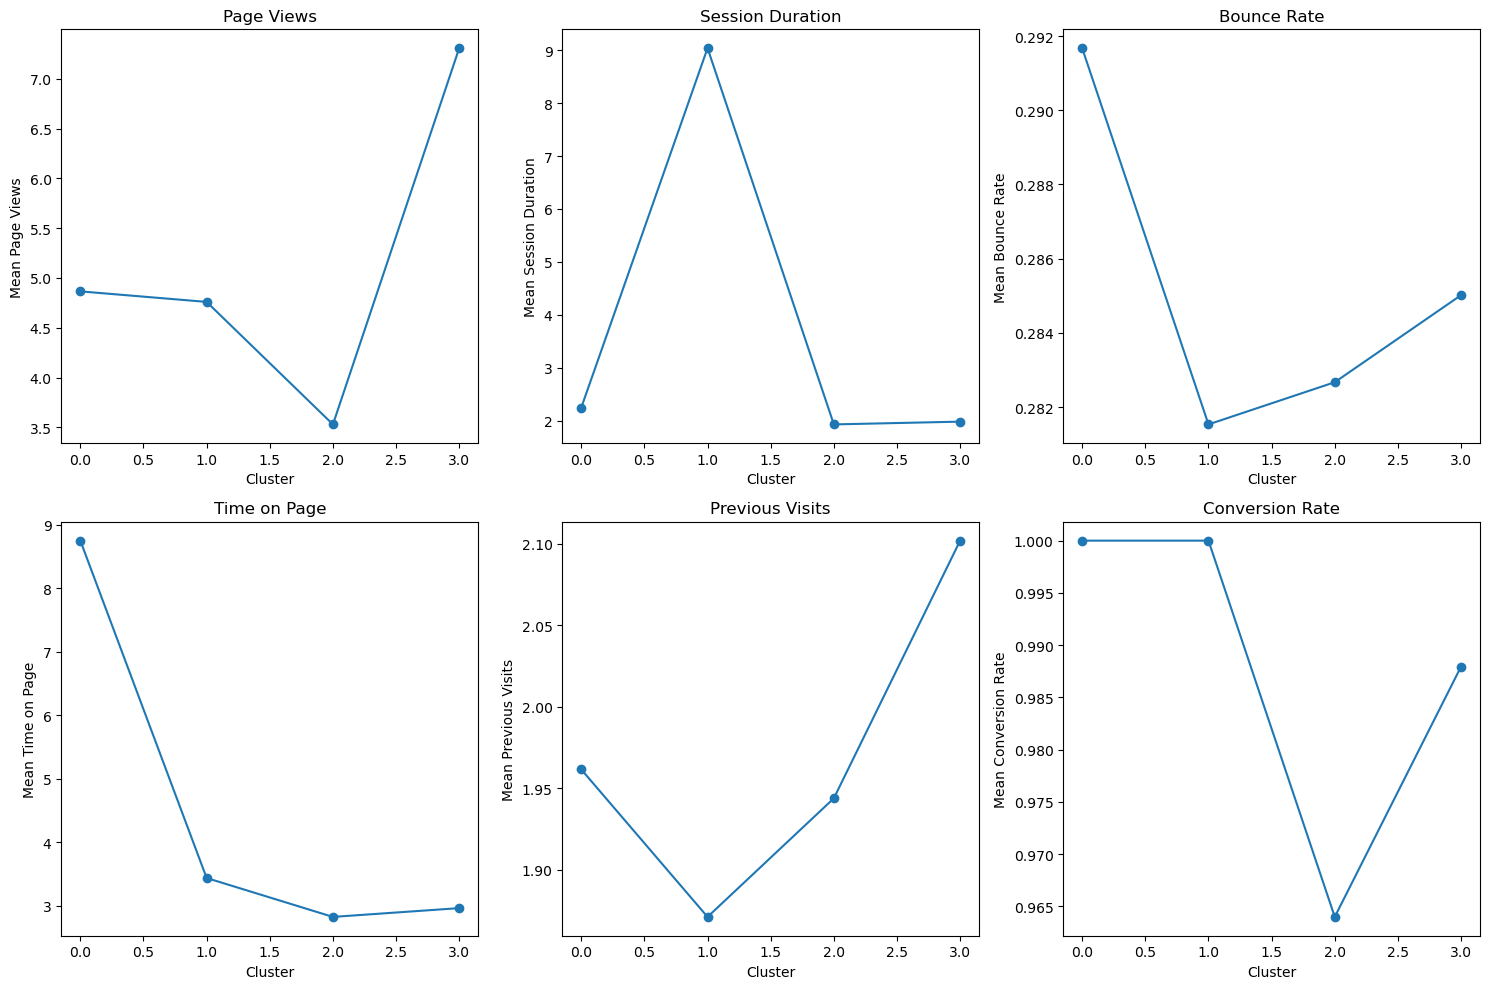

In [31]:
features = ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']
num_clusters = cluster_means.index

# Plot each feature against clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.plot(num_clusters, cluster_means[feature], marker='o')
    plt.title(f'{feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
plt.tight_layout()
plt.show()

**11. Line Plot Findings Interpretation**

1) **Page Views:**
   Cluster 3 stands out with the highest number of page views.
   Cluster 2 has the lowest page views, indicating a potential lack of engagement.

2) **Session Duration:**
   Cluster 1 has the longest session duration by a significant margin, indicating users in this cluster spend more time on the site.
   Clusters 2 and 3 have much shorter session durations, suggesting a quick interaction with the site.

3) **Bounce Rate:**
Cluster 0 has the highest bounce rate, while Cluster 1 has the lowest, suggesting that users in Cluster 1 are more likely to explore multiple pages.

4) **Time on Page:**
Cluster 0 has the highest time on page, indicating users spend more time per page.
Cluster 2 has the lowest time on page, showing that users quickly scan through the pages.

5) **Previous Visits:**
Cluster 3 has the highest number of previous visits, indicating repeat users who may be more familiar with the site.
Cluster 1 has the lowest number of previous visits, suggesting they might be newer users.

6) **Conversion Rate:**
Clusters 0 and 1 have a perfect conversion rate, while Cluster 2 has the lowest. Cluster 3 still has a high conversion rate, indicating effective user interactions.

In [9]:
# this k number will change the heatmap generated
k = 7

correlation = new_traffic.corr(numeric_only=True)
cols = correlation.nlargest(k, 'Conversion Rate')['Conversion Rate'].index
print(cols)

Index(['Conversion Rate', 'Time on Page', 'Session Duration', 'Page Views',
       'Previous Visits', 'Bounce Rate', 'clusters'],
      dtype='object')


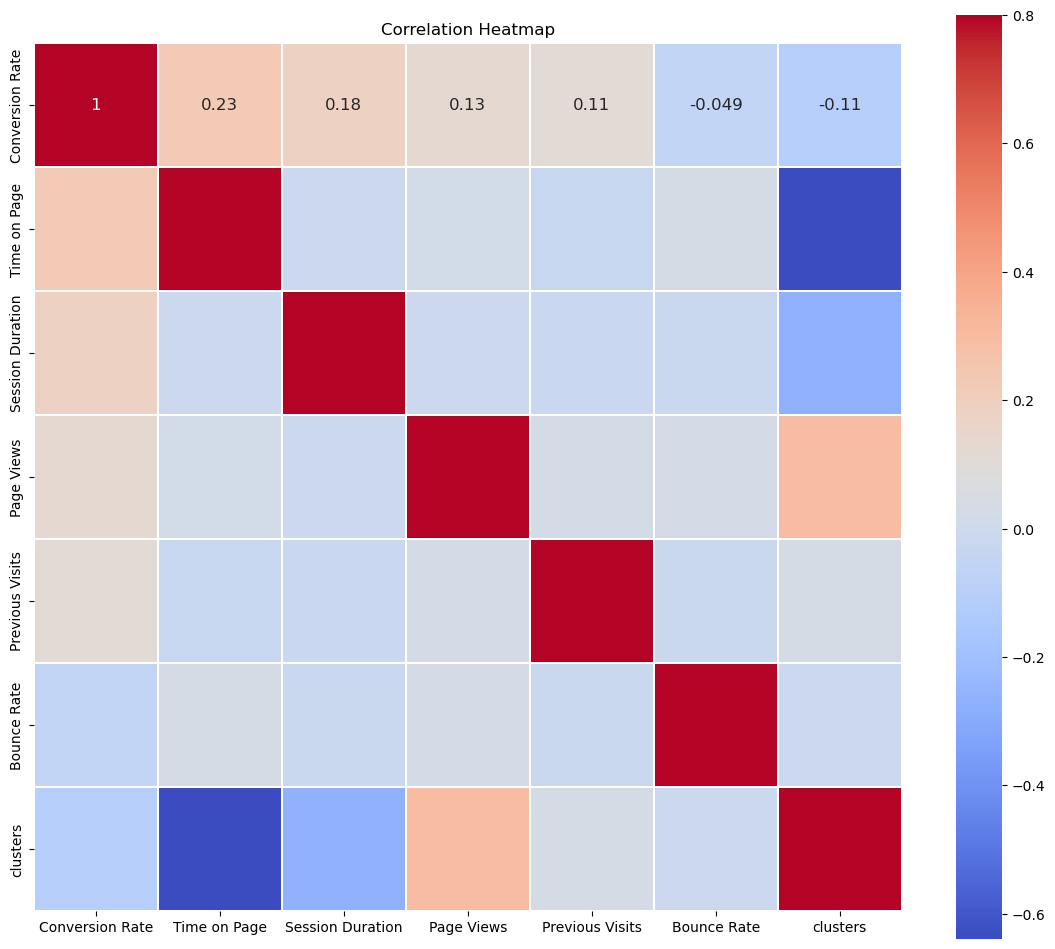

In [10]:
cm = np.corrcoef(new_traffic[cols].values.T)

fig, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='coolwarm', xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)
plt.title("Correlation Heatmap")
plt.show()

**11. HeatMap Findings Interpretation**

The **higher** the absolute value of the correlation coefficient, the **stronger** the influence of that feature on the 'Conversion Rate'.

In the heatmap, the correlation between **'Conversion Rate'** and **'Time on Page'** is **0.23**, which is the **highest** among the features listed.

This means 'Time on Page' is the **most influential feature** with respect to 'Conversion Rate'. A **positive correlation** of 0.23 indicates a **moderate positive relationship**, suggesting that as the 'Time on Page' increases, the 'Conversion Rate' tends to increase as well.

A higher 'Time on Page' might indicate more user engagement, which could lead to a higher likelihood of conversion. This insight suggests that optimizing and encouraging users to spend more time on the page could positively impact the conversion rate.

1) Time on Page: Correlation = 0.23
This is the **strongest positive correlation** in this dataset.

3) Session Duration: Correlation = 0.18
This also shows a **positive relationship** with Conversion Rate, though **slightly weaker** than Time on Page.

3) Page Views: Correlation = 0.13
This feature has a **moderate positive** correlation with Conversion Rate.

4) Previous Visits: Correlation = 0.11
This feature shows a **weaker, but still positive**, correlation with Conversion Rate.

**Summary:**

Since **'Time on Page'** has the strongest positive correlation with 'Conversion Rate' (0.23), focus on strategies to increase the time users spend on **individual pages**. This could include:
1) **Engaging Content:** Enhance the quality and relevance of the content on each page to keep users engaged longer.
2) **Interactive Elements:** Add interactive elements like videos, quizzes, or tools that encourage users to spend more time on the page.
3) **Clear Call to Action (CTA):** Place CTAs in a way that guides users through the content, ensuring they stay longer and engage more deeply before converting.

**Recommendations:**

1) **Improve User Engagement in Cluster 2:**
Cluster 2 has the lowest conversion rate (0.96) and lower engagement metrics (e.g., low 'Time on Page' and 'Session Duration'). 
- **Targeted Content:** Customize content or product offerings based on user behavior patterns to better match their interests.
- **Personalized Experiences:** Implement personalized recommendations and dynamic content that caters to the specific needs of this user segment.
- **Remarketing Campaigns:** Use remarketing techniques to re-engage these users and encourage them to return and convert.
  
2) **Leverage Repeat Visitors (Cluster 3):**
Cluster 3 has the highest average page views and a high conversion rate (0.99), indicating familiarity with the site. 
- **Loyalty Programs:** Introduce loyalty programs or special offers for repeat visitors to encourage continued engagement and conversion.
- **Streamlined Navigation:** Simplify the user journey for these users by providing quick access to frequently visited pages or previously viewed products/services.

3) **Focus on Users with Long Session Durations (Cluster 1):**
Cluster 1 users have very long session durations (9.04 minutes) and a perfect conversion rate (1.00).
- **Upselling and Cross-Selling:** Implement strategies like upselling and cross-selling during their extended sessions to increase the average transaction value.
- **In-depth Guides and Resources:** Provide detailed guides, resources, or tutorials that align with the interests of these users, keeping them engaged longer and increasing the likelihood of higher-value conversions.

4) **Reduce Bounce Rate for Cluster 0:**
Cluster 0 has a slightly higher bounce rate (0.29).
- **Enhanced First Impressions:** Improve the landing page design and load times to reduce the likelihood of users bouncing after viewing only one page.
- **A/B Testing:** Conduct A/B testing on key pages to identify elements that may be causing users to leave and make necessary adjustments.
Engagement Triggers: Use pop-ups, chatbots, or other engagement triggers to capture user interest before they leave the page.